## CSCE 676 :: Data Mining and Analysis :: Texas A&M University :: Spring 2022


# Homework 1: Let's GOOOOO!

- **100 points [7% of your final grade]**
- **Due Tuesday, February 13 by 11:59pm**

***Goals of this homework:***
1. Collect data from the web, clean it, and then make some observations based on exploratory data analysis
2. Understand and implement the classic apriori algorithm and extensions to find the association rules in a movie rating dataset

***Submission instructions:***

You should post your notebook to Canvas (look for the homework 1 assignment there). Please name your submission **your-uin_hw1.ipynb**, so for example, my submission would be something like **555001234_hw1.ipynb**. Your notebook should be fully executed when you submit ... so run all the cells for us so we can see the output, then submit that. 

***Late Days:***

As a reminder, you may use up to three of your late days on this homework, meaning the latest we will accept it is February 16 by 11:59pm.

***Collaboration declaration:***

If you worked with someone on this homework, please be sure to mention that. Remember to include citations to any sources you use in the homework.

## (50 points) Part 1: UFOs

### (10pts) Part 1a: UFOs are Out There, But First I Need to Store them Locally

For this first part, we're going to collect evidence of UFO sightings from the **National UFO Reporting Center**. Specifically, we're going 
to focus only on UFO sightings in Texas, as reported at this webpage:

* http://www.nuforc.org/webreports/ndxlTX.html

Recall that you can view the source of a webpage in Chrome under View &rarr; Developer &rarr; View Source. 
You'll notice, however, that this raw HTML is not in our friendly csv format and so will require some initial pre-processing. 
In particular, we're going to use the Python libraries **[requests](http://docs.python-requests.org/en/master/)** 
and **[beautiful soup](https://www.crummy.com/software/BeautifulSoup/)** to convert this UFO data from its original HTML format into csv. 

Hints:
* You'll notice that the column headers are in the `<TH>` tags.
* The values are in the `<TD>` tags.
* In beautiful soup, something like `.find_all('td')` may help you.
* To write the csv, you might want to `import csv` and take a look at the functions provided.
* If you google for "beautifulsoup table to csv" you should find some nice starting points.  Note, however, that you may not use an existing method that auto-magically converts the HTML into csv; we expect you to write your own code. If you borrow some elements from online resources, you should cite them in the comments. 

In [2]:
# your code here
# you should use requests to get the webpage, then extract 
# the appropriate column headings and rows
# then write this out to csv to a local file called 'ufos_in_texas.csv'
"""
Sources:https://www.pluralsight.com/guides/extracting-data-html-beautifulsoup
https://www.kite.com/python/examples/4420/beautifulsoup-parse-an-html-table-and-write-to-a-csv

"""
from bs4 import BeautifulSoup
import requests
# from itertools import izip
import csv
url ='http://www.nuforc.org/webreports/ndxlTX.html'
webpage = requests.get(url)

soup = BeautifulSoup(webpage.text, "html.parser")
ufo_table=soup.find("table")
#There is only one table in the entire webpage with no class

headers=[]
out_data=[]

#Extracting Column Headings
for col in ufo_table.findAll('th'):
  headers.append(col.text)
# print(headers)

#Extracting the row-wise Data shared by Users
for row in ufo_table.findAll('tr'):
  iter_data={}
  for iter in range(len(row.findAll("td"))):
    iter_data[headers[iter]]=row.findAll("td")[iter].text
  out_data.append(iter_data)
# print(out_data)

#Writing into csv file
with open('ufos_in_texas.csv','w') as csvfile:
  output=csv.DictWriter(csvfile, fieldnames=headers)
  output.writeheader()
  for x in out_data:
    if x:
      output.writerow(x)



Once you have your local csv file, you should read it in and then issue the .head() command.

In [3]:
# your code here
import pandas as pd

"""
https://www.tutorialspoint.com/how-to-read-csv-file-in-python
https://www.javatpoint.com/pandas-dataframe-head#:~:text=Pandas%20DataFrame.-,head(),a%20data%20frame%20or%20series.
"""
data_ufo = pd.read_csv("ufos_in_texas.csv")     
data_ufo.head() 


,Date / Time,City,State,Shape,Duration,Summary,Posted
0,12/14/21 22:30,Dallas,TX,Formation,8 minutes,It was loud like rocket in a V shape.,12/19/21
1,12/12/21 17:30,Dallas,TX,Light,10 minutes,A light that was fading in and out.,12/19/21
2,12/9/21 16:30,Lazerbet,TX,Other,Google maping,It's big,12/19/21
3,12/9/21 16:00,Lazerbet,TX,Triangle,NaN,Unhuman,12/19/21
4,12/7/21 17:30,Oak Cliff,TX,Unknown,NaN,I was randomly taking pictures of the clouds a...,12/19/21


### (15pts) Part 1b: UFOs are a Mess! Time to Clean Up!

Okay, now we move to the fun part -- making sense of this messy data. These UFO reports are user-generated with little input validation. As a result, you will notice lots of oddities. 

Let's begin by focusing on the **Duration** column. As a first pass, let's make a grossly simplifying assumption -- that the only valid data is any duration that is of the form:  

* 1 second
* 2 seconds
* ...
* 1 minute
* 2 minutes
* ...
* 1 hour
* 2 hours 
* ...
* 1 day
* 2 days 
* ...

That is, we will only accept positive integers followed by a space, followed by a properly spelled unit. Every other entry is invalid. For example, that means these are all invalid durations:

* 1s
* 2 min.
* 2-3 seconds
* 10-15min
* 1 minute+
* 30 minutes and longer
* about 1.5 minutes

You may find the **pandas** library to be very helpful for this part. Create a new pandas dataframe that only includes sightings with these values, **where you convert all durations into seconds**. How many total rows are there in the original dataset? How many rows in your new 'validated' dataset? Report the basic statistics of the duration in your new 'validated' dataset (report maximum, minimum, mean, and standard deviation values of duration). At last, plot a boxplot of the duration (in seconds) in your 'validated' dataset.

In [4]:
# your code here 
# filter our invalid durations
# convert all valid durations to seconds
import pandas as pd

# filetring out the Invalid Duration

output_list=[]
for iter in data_ufo["Duration"]:
  temp=str(iter).split()
  flag=0
  flag2=0
  for iter2 in temp:
    if iter2.lower() not in ['seconds','second','hour','hours','minute','minutes','day','days','year',"years"]:
      for i in iter2:
        flag=2
        if i not in '1234567890':
          flag=1
          break
    else:
      flag2+=1
    if(flag==1):
      break
  if(flag==2 and flag2==1):
        output_list.append(iter)
# print("The length of validated Dataset is "+ str(len(output_list)))

##Conversion to seconds
seconds_list=[]
temp=[]
temps=[]
for iter in output_list:
  temp.append(iter.split()[1])
  temps.append(iter.split()[0])
for iter in output_list:
  if(iter.split()[1].lower() in ['minutes','minutes']):
    seconds_list.append(int(iter.split()[0])*60)
  elif (iter.split()[1].lower() in ['hours','hour']):
    seconds_list.append(int(iter.split()[0])*60*60)
  elif (iter.split()[1].lower() in ['day','days']):
    seconds_list.append(int(iter.split()[0])*24*60*60)
  elif (iter.split()[1].lower() in ['years','year']):
    seconds_list.append(int(iter.split()[0])*24*60*60*365)
  else:
    seconds_list.append(int(iter.split()[0]))
# print(seconds_list)
# print(set(temp))
# print(set(temps))

In [ ]:
# #Approach-2 using regex
import re

"""
Collaborated with classmates for the idea of regex
"""

valid_unit = '^(\d+\s+(days|day|hours|hour|minutes|minute|seconds|second|week|weeks|month|months|year|years))$'
ufo_data_clean = data_ufo.loc[data_ufo['Duration'].str.match(valid_unit, na = False, flags = re.I)]
len(ufo_data_clean)

seconds_list = []
count = 0
for i, j in ufo_data_clean.iterrows():
  j = ufo_data_clean['Duration'][i]
  d = j.lower().split()
  time = int(d[0])
  
 ## Conversion into seconds
  if(d[1] == "minute" or d[1] == "minutes"):
    time = time*60
  elif(d[1] == "hour" or d[1] == "hours"):
    time = time*60*60
  elif(d[1] == "day" or d[1] == "days"):
    time = time*24*60*60
  elif(d[1] == "week" or d[1] == "weeks"):
    time = time*7*24*60*60
  elif(d[1] == "month" or d[1] == "months"):
    time = time*30*24*60*60
  elif(d[1] == "year" or d[1] == "years"):
    time = time*365*24*60*60
  seconds_list.append(time)




In [ ]:
# your code here
# total rows in original dataset
print('Total rows in original dataset-> '+ str(len(data_ufo)))
# valid rows in your new 'validated' dataset
print("The length of validated Dataset -> "+ str(len(seconds_list)))

Total rows in original dataset-> 5631
The length of validated Dataset -> 2956


Statistics of the Validated Set:
Length ->2956
Maximum ->157680000
Minimum ->1
Mean ->54919.65257104195
Standard Deviation ->2900194.783316995


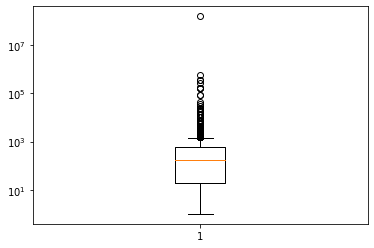

In [ ]:
# your code here
# report the basic statistics of duration in 'validated' dataset
import matplotlib.pyplot as plt
seconds_list=pd.Series(seconds_list)
print("Statistics of the Validated Set:")
print("Length ->"+str(len(seconds_list)))
print("Maximum ->"+str(max(seconds_list)))
print("Minimum ->"+str(min(seconds_list)))
print("Mean ->"+str(seconds_list.mean()))
print("Standard Deviation ->"+str(seconds_list.std()))
# boxplot code here
plot = plt.subplot()
plot.boxplot(seconds_list)
plot.set_yscale('log')

### (15pts) Part 1c: Can we do better?
Interesting. But we threw away a **lot** of data. We can do better. For this part, you will do your best to clean up the durations from your original dataset. Keep in mind some initial guidelines:

* If a duration has a range, use the average as its value. For example, if the duration is listed as “6-8 minutes”, you should consider the duration as “7 minutes”. (Again, you will need to eventually convert minutes into seconds).
* If a duration has a “<” sign, you should simply ignore the “<” sign. For example if the duration is specified as “< 1 minute”, consider the duration to be “1 minute”. You should subsequently convert “1 minute” to "60 seconds".
* If a duration has a “>” sign, you should simply ignore the “>” sign. 
* You should ignore any row with an empty duration.

You will probably have to improvise as you go along, so **make detailed notes of what decisions you are making and why**.

In [ ]:
# your code here 
# clean data 
# convert cleaned durations to seconds
#Without Regex

"""Taking the following attributes
1. Duration listed like 6-8 minutes or 6-8 minute 
2. Duration with > 
3. Duration with <

only proper time units are considered like minute or minutes. 
min, hr have not been considered.
"""

compare=[]
import pandas as pd
output_list=[]
for iter in data_ufo["Duration"]:
  iterq=iter
  iter=str(iter)

  iter=(iter).replace(">","")
  iter=(iter).replace("<","")
  if("-" in iter ):
    if(len(iter.split("-")[1].split())==2):
      if(iter.split("-")[1].split()[1].lower() in ['seconds','second','hour','hours','minute','minutes','day','days'] and iter.split("-")[0].isnumeric() and iter.split("-")[1].split()[0].isnumeric() ):
        # print(iter)
        iter=str((int(iter.split("-")[0])+int(iter.split("-")[1].split()[0]))//2)+" "+iter.split("-")[1].split()[1]
        compare.append(iterq)
  temp=str(iter).split()
  flag=0
  flag2=0
  for iter2 in temp:
    if iter2.lower() not in ['seconds','second','hour','hours','minute','minutes','day','days','year','years']:
      for i in iter2:
        flag=2
        if i not in '1234567890':
          flag=1
          break
    else:
      flag2+=1
    if(flag==1):
      break
  if(flag==2 and flag2==1):
        output_list.append(iter)
# print(len(output_list))
seconds_list=[]
temp=[]
temps=[]

for iter in output_list:
  temp.append(iter.split()[1])
  temps.append(iter.split()[0])

for iter in output_list:
  if(iter.split()[1].lower() in ['minutes','minutes']):
    seconds_list.append(int(iter.split()[0])*60)
  elif (iter.split()[1].lower() in ['hours','hour']):
    seconds_list.append(int(iter.split()[0])*60*60)
  elif (iter.split()[1].lower() in ['day','days']):
    seconds_list.append(int(iter.split()[0])*24*60*60)
  elif (iter.split()[1].lower() in ['years','year']):
    seconds_list.append(int(iter.split()[0])*24*60*60*365)
  else:
    seconds_list.append(int(iter.split()[0]))
# print(seconds_list)
# print(set(temp))
# print(set(temps))

output_compare=[]
for iter in data_ufo["Duration"]:
  iter=str(iter)
  if( "-" in iter):
    output_compare.append(iter)

# for i in output_compare:
#   if(">" in i or "<" in i):
#     print(i)
# print(len(output_compare))
# print(len(compare))
# print(len(set(output_compare)))
# print(len(set(compare)))
# print((set(output_compare)-set(compare)))


In [ ]:
#Using Regex-2
# Collaborated with classmates for this approach
import numpy as np
import re
import pandas as pd

"""Taking the following attributes
1. Duration listed like 6-8 minutes or 6-8 minute 
2. Duration with > and with unit minute or minutes
3. Duration with < and with unit minute or minutes
4. 1. Duration listed like 6(space)-(space)8 minutes or 6 - 8 minute 
only proper time units are considered like minute or minutes. 
min, hr have not been considered.
"""
valid_1= '^(\d+\s+(?i)(second|seconds|minutes|minute|hour|hours|day|days))$' + '|' + '^(>\d+\s+(?i)(second|seconds|minutes|minute|hour|hours|day|days))$' + '|' + '^(<\d+\s+(?i)(second|seconds|minutes|minute|hour|hours|day|days))$' + '|' + '^(\d+\s*\-\s*\d+\s+(?i)(second|seconds|minutes|minute|hour|hours|day|days))$'

# valid_1= '^(\d+\s+(?i)(second|seconds|minutes|minute|hour|hours|day|days|month|months|year|years))$' + '|' + '^((\\<|\\>|\~)\s*\d+\s*(?i)(second|seconds|minutes|minute|hour|hours|day|days|month|months|year|years))$' + '|' + '^(\d+\s*\-\s*\d+\s+(?i)(second|seconds|minutes|minute|hour|hours|day|days|month|months|year|years))$'
data_ufo_valid = data_ufo.loc[data_ufo['Duration'].str.match(valid_1, na = False)]


seconds_list_2 = []

for i, dat in data_ufo_valid.iterrows():
  dat = data_ufo_valid['Duration'][i]
  dat = dat.lower()
  value = re.findall('[0-9]+', dat)  
  numeric = [int(i) for i in value] 
  time_1  = np.mean(numeric)
  

  if(dat.find("min") != -1):
    time_1 = time_1*60
  elif(dat.find("hour") != -1):
    time_1 = time_1*60*60
  elif(dat.find("day") != -1):
    time_1 = time_1*24*60*60
  elif(dat.find("week") != -1):
    time_1 = time_1*7*24*60*60
  elif(dat.find("month") != -1):
    time_1 = time_1*30*24*60*80
  elif(dat.find("year") != -1):
    time_1 = time_1*365*24*60*60
  seconds_list_2.append(time_1)



In [ ]:
# your code here
# total rows in original dataset
# valid rows in your cleaned dataset
print('Total rows in original dataset- '+ str(len(data_ufo)))
print('Total rows in cleaned dataset - '+str(len(seconds_list_2))) 


Total rows in original dataset- 5631
Total rows in cleaned dataset - 3426


Maximum-> 157680000
Minimum-> 1
Mean-> 47524.17752347418
Standard Deviation->2701016.9396190355


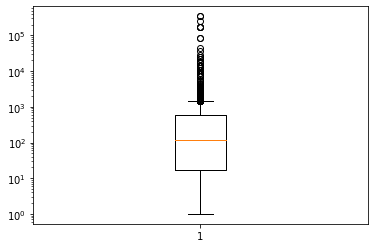

In [ ]:
# your code here
# report the basic statistics of duration in your cleaned dataset
# draw a boxplot for your cleaned dataset
import matplotlib.pyplot as plt
import pandas as pd

seconds_list=pd.Series(seconds_list)
print("Maximum-> "+ str(max(seconds_list)))
print("Minimum-> "+ str(min(seconds_list)))
print("Mean-> "+ str(seconds_list.mean()))
print("Standard Deviation->"+str(seconds_list.std()))

plot_2 = plt.subplot()
plot_2.boxplot(seconds_list_2)
plot_2.set_yscale('log')



### (5pts) Part 1d: Observations and Conclusions

Based on your analysis on part 1b and 1c, what observations or conclusions can you make from the data?

*your answer here*

 

1.  By filtering out all the data stringently, we miss out on a lot of valid data like in 1.b which has been captured in 1.c. 
2.   As there is more data, in the case of 1.c it is more beneficial to run the statistics and makes more sense than 1.b


 


### (5pts) Part 1e: Next Steps

Now is your chance to conduct an interesting analysis on the UFO data you have collected. This is open-ended, so you may choose whatever direction you like. For example, you might want to take a look at the shape of the UFOs or perhaps the temporal aspects of the reports. 

In [ ]:
# your code here
import statistics
from statistics import mode
from collections import Counter

shapes_ufo= data_ufo["Shape"]
c=Counter(shapes_ufo)
i=10
print("Top "+str(i) + " Common Shapes in given dataset is " + str(c.most_common(i)))
#Reference: https://www.codegrepper.com/code-examples/python/python+list+10+most+frequent+elemens+in+list

Top 10 Common Shapes in given dataset is [('Light', 1136), ('Triangle', 560), ('Circle', 520), ('Other', 440), ('Unknown', 427), ('Disk', 344), ('Sphere', 342), ('Fireball', 302), ('Oval', 299), ('Formation', 188)]


*tell us what next steps you took, and what you discovered*

---

The have made a list of the top 10 shapes in the dataset using **Counter**
The Top 10 shapes are as follows:
1. Light
2. Traingle
3. Circle
4. Other
5. Unknown
6. Disk
7. Sphere
8. Fireball
9. Oval
10. Formation

## (50 points) Part 2: Association Rules in Movie Rating Behaviors

For the second part of this homework, we're going to examine movies using our understanding of association rules, to find movies that "go together". For this part, you will implement the apriori algorithm, and apply it to a movie rating dataset. We'll use the [MovieLens](https://grouplens.org/datasets/movielens/) dataset.

First, run the next cell to load the dataset we are going to use.

In [ ]:
import urllib3
import zipfile

http = urllib3.PoolManager()
req = http.request("GET", "https://files.grouplens.org/datasets/movielens/ml-latest-small.zip", preload_content=False)

with open("movie.zip", 'wb') as out:
  while True:
    data = req.read(4096)
    if not data:
      break
    out.write(data)
req.release_conn()

zFile = zipfile.ZipFile("movie.zip", "r")
for fileM in zFile.namelist():
  zFile.extract(fileM)

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [ ]:
!ls ml-latest-small/

links.csv  movies.csv  ratings.csv  README.txt	tags.csv


In this dataset, there are four columns: `userId` is the integer ids of users, `movieId` is the integer ids of movies, `rating` is the rate of the user gives to the movie, and `timestamp` which we do not use here. Each row denotes that the user of given `userId` rated the movie of the given `movieId`. We are going to treat each user as a "basket", so you will need to collect all the movies that have been rated by a single user as a basket. 

Now, you need to implement the apriori algorithm and apply it to this dataset to find association rules of user rating behaviors where:

1. Define `rating` >= 3 is "like" (that is, only consider movie ratings of 3 or higher in your baskets; you may ignore all others)
2. `minsup` == 40 (out of 600 users/baskets); we may adjust this based on the discussion on Campuswire
3. `minconf` == to be determined by a discussion on Campuswire. You may try several different choices, but we will converge on a good choice for everyone for the final submission.
 
We know there are many existing implementations of apriori online (check github for some good starting points). You are welcome to read existing codebases and let that inform your approach. Do not copy-paste any existing code. We want your code to have sufficient comments to explain your steps, to show us that you really know what you are doing. Furthermore, you should add print statements to print out the intermediate steps of your method -- e.g., the size of the candidate set at each step of the method, the size of the filtered set, and any other important information you think will highlight the method. 

To help get you started, we can load the ratings with the following code snippet:

In [ ]:
import pandas as pd
# read user ratings
allRatings = pd.read_csv("ml-latest-small/ratings.csv")
allRatings = allRatings[allRatings['rating']>=3]
df_movie_rating = allRatings

### (15pts) Step 1: Implement Apriori Algorithm
In this section, you need to implement the Apriori algorithm, we will check the correctness of your code and we encourage efficient implementation and skills of pruning.

In [ ]:
# your code here, including all the helpful print statements
from itertools import chain
from itertools import combinations
from collections import defaultdict
import pandas as pd
import urllib3
import zipfile

#Mapping all data with the corresponding UserIds
def mappingdata(value):
  print("Group the data on User Ids")
  groupId= df_movie_rating.sample(frac = value).groupby('userId')
  users=groupId.groups.keys()
  Id=[]
  for i in users:
      Id.append((groupId.get_group(i).movieId.values))
  
  #Updated Dataframe
  Main_List=pd.DataFrame({'userId':users,'movieId':Id}).movieId
  print(Main_List)
  print()
  return Main_List


#Function for Apriori Algo
def apriori(movie_list, min_Sup, min_Conf,alpha, minsup_DFactor):
    total_Frequency = []
    iter_Set = set()
    for i in movie_list:
        for j in i:
             iter_Set.add(frozenset([j]))
    print("\nTotal of  "+str(len(iter_Set))+ " items.")  


    # Frequent ItemSet
    Freq_Set = dict()


    # Including support count
    Items_support = defaultdict(int)


    #Find first freq item Q
    Q_ISet = set()
    x = defaultdict(int)
    for i in iter_Set:
        for iter_Set in movie_list:
            if i.issubset(iter_Set):
                Items_support[i] += 1
                x[i] += 1
    for i, num in x.items():
        support = num
        if(support >= min_Sup*minsup_DFactor*alpha):
          Q_ISet.add(i)
    
    curr_Freq_Set = Q_ISet
    total_Frequency = total_Frequency + list(curr_Freq_Set)
    
    key = 2

    # Calculating Freq itemsets
    while(curr_Freq_Set):
        x = len(curr_Freq_Set)
        print("\n"+str(key-1)+" size Itemsets for support > " +str(min_Sup*alpha*minsup_DFactor)+" are "+str(x)+"\n")
        Freq_Set[key-1] = curr_Freq_Set


        # Including the current item to freq items group
        curr_Cand = set([i.union(j) for i in curr_Freq_Set for j in curr_Freq_Set if len(i.union(j)) == key])


        #Pruning to remove the less freq itemsets
        x = curr_Cand.copy()
        for i in curr_Cand:
            groups = combinations(i, key-1)
            for s in groups:
                if(frozenset(s) not in curr_Freq_Set):
                    x.remove(i)
                    break
        curr_Cand=x

        #To Swap the curr itemset with new itemset
        Q_ISet = set()
        x = defaultdict(int)
        for i in curr_Cand:
            for curr_Cand in movie_list:
                if i.issubset(curr_Cand):
                    Items_support[i] += 1
                    x[i] += 1
        for i, count in x.items():
            sup = count
            if(sup >= min_Sup*minsup_DFactor*alpha):
              Q_ISet.add(i)

        curr_Freq_Set=Q_ISet
        total_Frequency = total_Frequency + list(curr_Freq_Set)
        key += 1
    
    #Association Rules
    
    association_rules = []
    for a, i in Freq_Set.items():
        for j in i:
            groups = chain.from_iterable(combinations(j, l) for l in range(1, len(j)))
            for s in groups:
                confidence = float(Items_support[j] / Items_support[frozenset(s)])
                if(confidence >= min_Conf):
                  association_rules.append([list(s) , list(j.difference(s))])
    print(Freq_Set)
    return association_rules, Freq_Set
    

association_rules, total_Frequency = apriori(mappingdata(1), 150, 0.8,1,1)
print("There are total "+str(len(association_rules))+" Association rules for the given dataset\n")
print(association_rules)


total_movie_List = []
for i in list(total_Frequency.values()):
  total_movie_List = total_movie_List + list(i)

print("Frequent itemset size is : " + str(len(total_movie_List)))

Group the data on User Ids
0      [2542, 2987, 1954, 1500, 2094, 2268, 2654, 70,...
1      [46970, 131724, 6874, 109487, 333, 122882, 715...
2      [26409, 5181, 7899, 5764, 1275, 70946, 2288, 5...
3      [3317, 1213, 4021, 1203, 595, 2874, 2762, 1077...
4      [364, 1, 36, 410, 110, 150, 39, 253, 261, 608,...
                             ...                        
604    [7010, 2474, 40955, 1650, 1912, 1320, 1380, 45...
605    [1544, 919, 2000, 589, 3994, 480, 3386, 1258, ...
606    [2353, 6059, 750, 2329, 736, 4873, 4016, 8810,...
607    [110, 589, 329, 1056, 786, 457, 434, 185, 356,...
608    [159, 7367, 4232, 112556, 107436, 3623, 1089, ...
Name: movieId, Length: 609, dtype: object


Total of  8452 items.

1 Itemsets with support > 150 are 37


2 Itemsets with support > 150 are 30


3 Itemsets with support > 150 are 2

{1: {frozenset({32}), frozenset({1}), frozenset({380}), frozenset({150}), frozenset({1196}), frozenset({2959}), frozenset({480}), frozenset({7153}), frozenset({1270

### (5pts) Step 2: Print Your Association Rules

Next you should print your final association rules in the following format:

**movie_name_1, movie_name_2, ... --> 
movie_name_k**

where the movie names can be fetched by joining the movieId with the file `movies.csv`. For example, one rule that you might find is:

**Matrix, The (1999),  Star Wars: Episode V - The Empire Strikes Back (1980),  Star Wars: Episode IV - A New Hope (1977),  -> 
Star Wars: Episode VI - Return of the Jedi (1983)**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
movie = {}
size=len(df_movie)
for i in range(size):
  temp_k=df_movie.loc[i,'movieId']
  val=df_movie.loc[i,'title']
  movie[temp_k] =val

left = []
right = []
for i in association_rules:
    left.insert(len(left),i[0])
    right.insert(len(right),i[1])
association_rules_left = []
for i in left:
    t_array = []
    for j in range(len(i)):
        temp_k = i[j]
        t_array.insert(len(t_array),movie[(temp_k)])
        rule_cond = movie[(temp_k)]
    association_rules_left.insert(len(association_rules_left),t_array)

association_rules_right = []
for i in right:
    t_array = []
    for j in range(0,len(i)):
        temp_k = i[j]
        rule_cond = movie[(temp_k)]
        t_array.insert(len(t_array),rule_cond)
    association_rules_right.insert(len(association_rules_right),t_array)

association_rules_final=[]
for x in range(len(association_rules_left)):
    association_rules_final.insert(len(association_rules_final),list([association_rules_left[x],association_rules_right[x]]))
print("There are",len(association_rules),"Association rules and they are as follows \n")

for x in association_rules_final:
    print(str(x[0])+"--> "+str((x[1])))

There are 14 Association rules and they are as follows 

['Lord of the Rings: The Return of the King, The (2003)']--> ['Lord of the Rings: The Fellowship of the Ring, The (2001)']
['Lord of the Rings: The Fellowship of the Ring, The (2001)']--> ['Lord of the Rings: The Return of the King, The (2003)']
['Jurassic Park (1993)']--> ['Forrest Gump (1994)']
['Star Wars: Episode V - The Empire Strikes Back (1980)']--> ['Star Wars: Episode IV - A New Hope (1977)']
['Star Wars: Episode VI - Return of the Jedi (1983)']--> ['Star Wars: Episode IV - A New Hope (1977)']
['Lord of the Rings: The Two Towers, The (2002)']--> ['Lord of the Rings: The Fellowship of the Ring, The (2001)']
['Lord of the Rings: The Fellowship of the Ring, The (2001)']--> ['Lord of the Rings: The Two Towers, The (2002)']
['Star Wars: Episode VI - Return of the Jedi (1983)']--> ['Star Wars: Episode V - The Empire Strikes Back (1980)']
['Seven (a.k.a. Se7en) (1995)']--> ['Pulp Fiction (1994)']
['Lord of the Rings: The Two To

### (15pts) Step 3: Implement Random Sampling

We discussed in class a method to randomly sample baskets to avoid the overhead of reading the entire set of baskets (which in practice, could amount to billions of baskets). For this part, you should implement such a random sampling approach that takes a special parameter **alpha** that controls the size of the sample: e.g., alpha = 0.10 means to sample 10% of the baskets (our users, in this case). 

Vary **alpha** and report the number of frequent itemsets you find and how this compares to the number of frequent itemsets in the entire dataset. What do you discover?


In [ ]:
# your code here
import random

ML1 = mappingdata(0.1)
ML2 = mappingdata(0.5)
ML3 = mappingdata(0.7)

r1, tf1 = apriori(ML1, 150, 0.9, 0.1, 1)
r2, tf2 = apriori(ML2, 150, 0.9, 0.5, 1)
r3, tf3 = apriori(ML3, 150, 0.9, 0.7, 1)


tf1 = list(tf1.values())
tf2 = list(tf2.values())
tf3 = list(tf3.values())
L1 = []
for i in tf1:
  L1 = L1 + list(i)

L2 = []
for i in tf2:
  L2 = L2 + list(i)

L3 = []
for i in tf3:
  L3 = L3 + list(i)

print(len(total_movie_List))
print(len(L1))
print(len(L2))
print(len(L3))

Group the data on User Ids
0      [3, 1023, 3168, 2628, 2291, 2137, 2899, 1092, ...
1                                [115713, 74458, 109487]
2                                                 [5181]
3      [1188, 4896, 2874, 1500, 2762, 538, 176, 3386,...
4                                      [58, 36, 50, 110]
                             ...                        
587    [5218, 5550, 1734, 431, 33903, 6350, 994, 3005...
588    [2006, 2858, 3421, 2907, 5060, 457, 553, 1997,...
589    [8784, 2194, 44665, 533, 34319, 37386, 802, 34...
590                        [339, 116, 296, 1150, 288, 1]
591    [54785, 91630, 7894, 140174, 94867, 79702, 162...
Name: movieId, Length: 592, dtype: object

Group the data on User Ids
0      [3386, 1282, 1136, 1196, 110, 593, 943, 3441, ...
1      [46970, 86345, 74458, 318, 68157, 79132, 12288...
2                              [26409, 3024, 2288, 7991]
3      [2762, 2174, 904, 2390, 1500, 1265, 1883, 215,...
4      [265, 253, 232, 595, 349, 21, 597, 318, 5

*your discussion here*

---




*  **By increasing the alpha, frequent itemsets are reducing further**


1.   There are 69 frequent itemsets for the entire dataset
2.   By Sampling 10% Dataset with minsup 15, 43 frequent itemsets are achieved
3.   By Sampling 50% Dataset with minsup 75, 39 frequent itemsets are achieved
4.   By Sampling 70% Dataset with minsup 105, 37 frequent itemsets are achieved









### (10pts) Step 4: Check for False Positives

Next you should verify that the candidate pairs you discover by random sampling are truly frequent by comparing to the itemsets you discover over the entire dataset. 

For this part, consider another parameter **minsup_sample** that relaxes the minimum support threshold. For example if we want minsup = 1/100 for whole dataset, then try minsup_sample = 1/125 for the sample. This will help catch truly frequent itemsets.

Vary **minsup_sample** and report the number of frequent itemsets you find and the number of false positives you find. What do you discover?


In [ ]:
import random


r1, tf1 = apriori(ML1, 10, 0.8, 1, 1)
r2, tf2 = apriori(ML1, 13, 0.8, 1, 1)
r3, tf3 = apriori(ML1, 15, 0.8, 1, 1)

tf1 = list(tf1.values())
tf2 = list(tf2.values())
tf3 = list(tf3.values())
l1 = []
for i in tf1:
  l1 = l1 + list(i)

l2 = []
for i in tf2:
  l2 = l2 + list(i)

l3 = []
for i in tf3:
  l3 = l3 + list(i)

count1 = 0
count2 = 0
count3 = 0

for i in (total_movie_List):
  if i in l1:
    count1 = count1+1
print('10% Random sampling and minsup = 10 the count of false positive is ' + str( len(l1)-count1))


for i in (total_movie_List):
  if i in l2:
    count2 = count2+1
print('50% Random sampling and minsup = 13 the count of false positive is ' + str( len(l2)-count2))

for i in (total_movie_List):
  if i in l3:
    count3 = count3+1
print('70% Random sampling and minsup = 15 the count of false positive is ' + str( len(l3)-count3))


Total of  3073 items.

1 Itemsets with support > 10 are 129

{1: {frozenset({292}), frozenset({1304}), frozenset({32}), frozenset({10}), frozenset({316}), frozenset({1196}), frozenset({1961}), frozenset({4995}), frozenset({51662}), frozenset({1704}), frozenset({924}), frozenset({50872}), frozenset({48780}), frozenset({6539}), frozenset({457}), frozenset({5418}), frozenset({47}), frozenset({858}), frozenset({593}), frozenset({5952}), frozenset({588}), frozenset({5445}), frozenset({595}), frozenset({367}), frozenset({110}), frozenset({34}), frozenset({2762}), frozenset({3}), frozenset({293}), frozenset({1387}), frozenset({2571}), frozenset({4973}), frozenset({1258}), frozenset({8874}), frozenset({25}), frozenset({111}), frozenset({1214}), frozenset({3996}), frozenset({551}), frozenset({4226}), frozenset({1682}), frozenset({1307}), frozenset({1721}), frozenset({541}), frozenset({4993}), frozenset({8360}), frozenset({58559}), frozenset({2858}), frozenset({6874}), frozenset({68954}), froze

*your discussion here*

---
**By Increasing the confidence, the count of false positives reduces**


*   10% Random sampling and minsup = 10 the count of false positive is 94
* 50% Random sampling and minsup = 13 the count of false positive is 37
* 70% Random sampling and minsup = 15 the count of false positive is 18






### (5pts) Step 5: Extensions and Next Steps

So far, we have been working with a fairly small dataset. For this last question, try your sampling-based approach on the much larger: **Movies 10M** dataset: https://files.grouplens.org/datasets/movielens/ml-10m.zip

First, we need to load this larger dataset:

In [ ]:
import urllib3
import zipfile

http = urllib3.PoolManager()
req = http.request("GET", "https://files.grouplens.org/datasets/movielens/ml-10m.zip", preload_content=False)

with open("movie.zip", 'wb') as out:
  while True:
    data = req.read(4096)
    if not data:
      break
    out.write(data)
req.release_conn()

zFile = zipfile.ZipFile("movie.zip", "r")
for fileM in zFile.namelist():
  zFile.extract(fileM)

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [ ]:
! ls ml-10M100K/

allbut.pl  movies.dat  ratings.dat  README.html  split_ratings.sh  tags.dat


In [ ]:
import pandas as pd
# read user ratings
allRatings = pd.read_csv("ml-10M100K/ratings.dat",sep='::', names=["userId", "movieId", "rating", "timestamp"], engine='python')[allRatings['rating']>=3]


Now you can begin your sampling over this larger dataset.

In [ ]:
# your code here
df_movie_rating = allRatings.sample(frac = 0.001)

group_ID = df_movie_rating.groupby('userId')
M_Id=[]
for i in group_ID.groups.keys():
    M_Id.append((group_ID.get_group(i).movieId.values))

M_L=pd.DataFrame({'userId':group_ID.groups.keys(),'M_Id':M_Id}).M_Id

rules, total_Frequency = apriori(M_L, 10000, 0.9, 0.001, 1)

tlist = []
for i in list(total_Frequency.values()):
  tlist = tlist + list(i)

print(len(tlist))


Total of  2631 items.

1 Itemsets with support > 10.0 are 172

{1: {frozenset({292}), frozenset({1653}), frozenset({1304}), frozenset({32}), frozenset({1230}), frozenset({10}), frozenset({316}), frozenset({1196}), frozenset({539}), frozenset({1961}), frozenset({1639}), frozenset({924}), frozenset({1120}), frozenset({1259}), frozenset({587}), frozenset({4306}), frozenset({3481}), frozenset({457}), frozenset({2396}), frozenset({2006}), frozenset({47}), frozenset({858}), frozenset({593}), frozenset({5952}), frozenset({588}), frozenset({196}), frozenset({185}), frozenset({5445}), frozenset({1617}), frozenset({595}), frozenset({2}), frozenset({367}), frozenset({6333}), frozenset({2012}), frozenset({590}), frozenset({110}), frozenset({34}), frozenset({2762}), frozenset({293}), frozenset({5349}), frozenset({1387}), frozenset({2571}), frozenset({628}), frozenset({4973}), frozenset({1258}), frozenset({153}), frozenset({25}), frozenset({1246}), frozenset({1552}), frozenset({1214}), frozenset({3

*your discussion here*

---


By Sampling data for 0.001% and factored by 10000 support value, the frequent itemset calculated was 172